<a href="https://colab.research.google.com/github/richardcepka/notebooks/blob/main/City_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install libraries
!pip install osmnx
!pip install stellargraph

In [ ]:
# Import libraries
import osmnx as ox
import networkx as nx
from networkx.algorithms.community import label_propagation_communities
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from stellargraph import StellarGraph
from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.manifold import spectral_embedding

# Prepare data

In [ ]:
# Load network
place = 'Bratislava, Slovakia'  # Defines, city name and country. For big cities, notebook will be way slower
network_type = 'drive'
G = ox.graph_from_place(place, network_type=network_type)

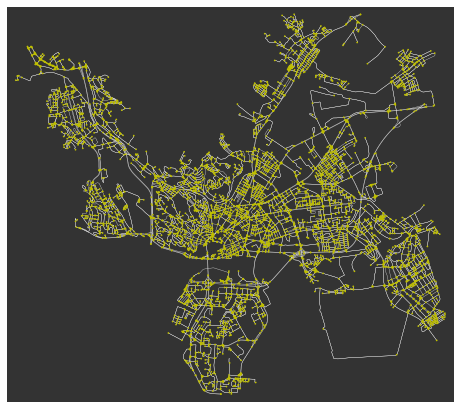

In [ ]:
fig, ax = ox.plot_graph(
    G,
    bgcolor="#333333",
    node_color='y',
    node_size=3,
    node_zorder=2,
    edge_linewidth=0.3,
    edge_color="w",
)

In [ ]:
# Add travel time information in seconds
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
weight_type = "travel_time"  # Defines, weight in weighted graph, choose from {"travel_time", "length"}

In [ ]:
# Transform multigraph to directed graph 
G_dir = ox.get_digraph(G)

# Network analysis

In [ ]:
# Compute graph statistics
basic_statistics = ox.basic_stats(G)
print(f"Number of nodes: {basic_statistics['n']}")
print(f"Number of edges: {basic_statistics['m']}")
print(f"Density: {nx.density(G_dir)}")
print(f"Total edge length: {basic_statistics['edge_length_total']}")
print(f"Average edge length: {basic_statistics['edge_length_avg']}")
print(f"Average clustering coefficient: {nx.average_clustering(G_dir, weight=weight_type)}")
dc = nx.degree_centrality(G_dir)
print(f"Average degree centrality: {sum(dc.values()) / len(dc)}")
bc = nx.betweenness_centrality(G_dir, weight=weight_type)
print(f"Average betweenness centrality: {sum(bc.values()) / len(bc)}")
cc = nx.closeness_centrality(G_dir, distance=weight_type)
print(f"Average closeness centrality: {sum(cc.values()) / len(cc)}")
pr = nx.pagerank(G_dir, weight=weight_type)
print(f"Max pagerank: {max((pr.values()))}")

Number of nodes: 5837
Number of edges: 12525
Density: 0.00036574484132151694
Total edge length: 1566689.0920000009
Average edge length: 125.08495744510985
Average clustering coefficient: 0.0006796430582911399
Average degree centrality: 0.0007314896826430651
Average betweenness centrality: 0.008259208196460895
Average closeness centrality: 0.0018822776123298825
Max pagerank: 0.0008287414499595848


## Centrality analysis

### Betweenness centrality

In [ ]:
# Compute top k betweenness centrality
top_k = 3  # Defines, top k nodes with maximum betweenness centrality
node_id_bc_top_k = sorted(bc.items(), key=lambda x: x[1], reverse=True)[:top_k]
node_id_top_k = list(list(zip(*node_id_bc_top_k))[0])
bc_top_k = list(list(zip(*node_id_bc_top_k))[1])
print(f"node_id: {node_id_top_k}")
print(f"bc: {bc_top_k}")

node_id: [26659990, 5410659, 7342314]
bc: [0.12063849768567053, 0.11447814087779483, 0.10954447265532084]


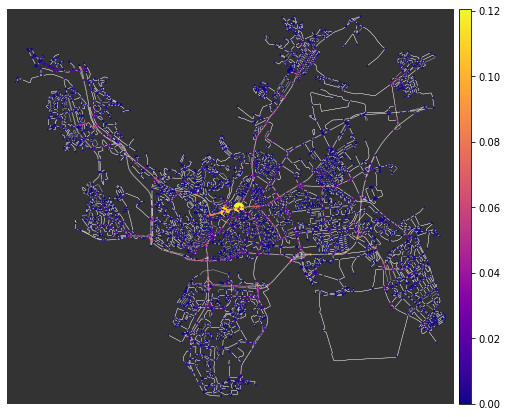

In [ ]:
# Plot betweenness centrality graph
nx.set_node_attributes(G, bc, "bc")
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
ns = [100 if node in node_id_top_k else 3 for node in G.nodes]
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    node_color=nc,
    node_size=ns,
    node_zorder=2,
    edge_linewidth=0.3,
    edge_color="w",
)
scalarmappaple = cm.ScalarMappable(cmap="plasma")
scalarmappaple.set_array(list(bc.values()))
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(scalarmappaple, cax=cax)
plt.show()

### Closeness centrality

In [ ]:
# Compute top k closeness centrality
top_k = 3  # Defines, top k nodes with maximum closeness centrality
node_id_cc_top_k = sorted(cc.items(), key=lambda x: x[1], reverse=True)[:top_k]
node_id_top_k = list(list(zip(*node_id_cc_top_k))[0])
cc_top_k = list(list(zip(*node_id_cc_top_k))[1])
print(f"node_id: {node_id_top_k}")
print(f"cc: {cc_top_k}")

node_id: [5410659, 322937133, 26659991]
cc: [0.0027003743461436786, 0.0026976180966532216, 0.002693630287878532]


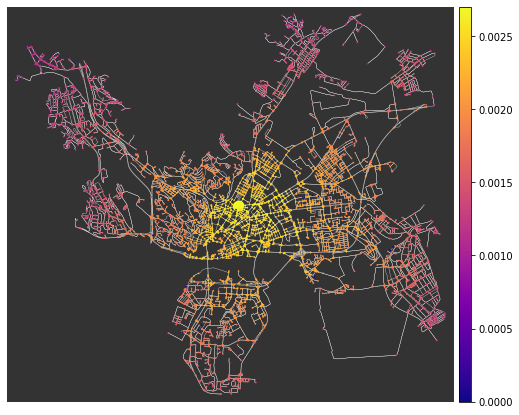

In [ ]:
# Plot closeness centrality graph
nx.set_node_attributes(G, cc, "cc")
nc = ox.plot.get_node_colors_by_attr(G, "cc", cmap="plasma")
ns = [100 if node in node_id_top_k else 3 for node in G.nodes]
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    node_color=nc,
    node_size=ns,
    node_zorder=2,
    edge_linewidth=0.3,
    edge_color="w",
)
scalarmappaple = cm.ScalarMappable(cmap="plasma")
scalarmappaple.set_array(list(cc.values()))
cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,0.02, ax.get_position().height])
plt.colorbar(scalarmappaple, cax=cax)
plt.show()

### PageRanke

In [ ]:
# Compute top k pagerank
top_k = 3  # Defines, top k nodes with maximum pagerank
node_id_pagerank_top_k = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:top_k]
node_id_top_k = list(list(zip(*node_id_pagerank_top_k))[0])
pagerank_top_k = list(list(zip(*node_id_pagerank_top_k))[1])
print(f"node_id: {node_id_top_k}")
print(f"pagerank: {pagerank_top_k}")

node_id: [273725046, 273775357, 27177628]
pagerank: [0.0008287414499595848, 0.0008239750530749585, 0.0008079055047416193]


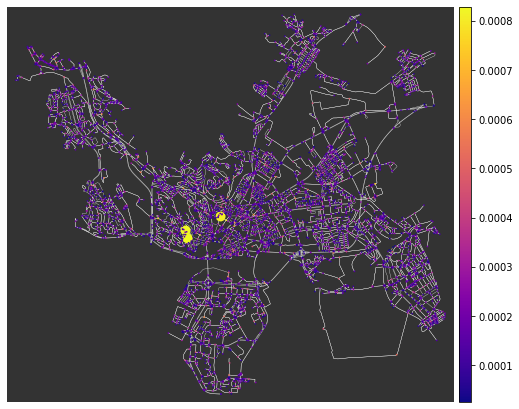

In [ ]:
# Plot pagerank graph
nx.set_node_attributes(G, pr, "pagerank")
nc = ox.plot.get_node_colors_by_attr(G, "pagerank", cmap="plasma")
ns = [100 if node in node_id_top_k else 3 for node in G.nodes]
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    node_color=nc,
    node_size=ns,
    node_zorder=2,
    edge_linewidth=0.3,
    edge_color="w",
)
scalarmappaple = cm.ScalarMappable(cmap="plasma")
scalarmappaple.set_array(list(pr.values()))
cax = fig.add_axes([ax.get_position().x1+0.01, ax.get_position().y0,0.02, ax.get_position().height])
plt.colorbar(scalarmappaple, cax=cax)
plt.show()

## Community detection

### Node2Vec

In [ ]:
# Create a weighted graph (length of street as weight)
G_stellar = StellarGraph.from_networkx(G_dir, edge_weight_attr=weight_type)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
# Prepare random walks
rw = BiasedRandomWalk(G_stellar)

walks = rw.run(
    nodes=list(G_stellar.nodes()),  # Root nodes
    length=80,  # Defines, maximum length of a random walk
    n=10,  # Defines, number of random walks per root node
    p=1.,  # Defines, (unormalised) probability, 1/p, of returning to source node
    q=0.2,  # Defines, (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 58370


In [ ]:
# Train Node2Vec
import multiprocessing

str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec(
    str_walks, 
    size=32,  # Defines, node embedding dimension
    window=25,  # Defines, window size
    iter=5,  # Defines, number of training epochs
    min_count=0, 
    sg=1, 
    workers=multiprocessing.cpu_count(), 
)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # List of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality

In [ ]:
# Find communities in euclidean space
n_clusters = 5  # Defines, number of communities
scaler = StandardScaler()
k_means = KMeans(n_clusters=n_clusters).fit(scaler.fit_transform(node_embeddings))
k_means.labels_

array([1, 0, 4, ..., 4, 1, 4], dtype=int32)

In [ ]:
# Apply t-SNE transformation on node embeddings for visualization
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


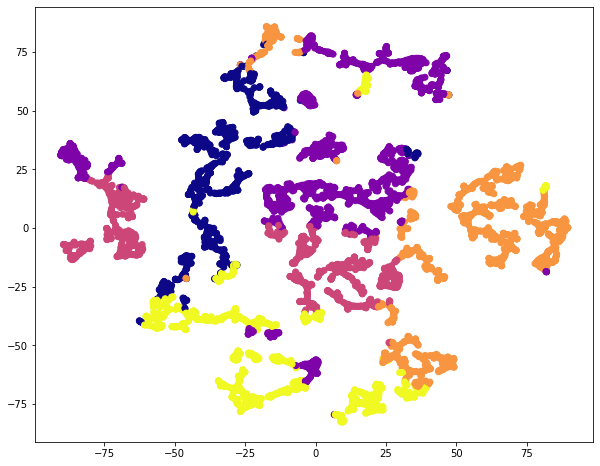

In [ ]:
# Visualize 2d representation of nodes with 
plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], c=k_means.labels_, cmap="plasma")

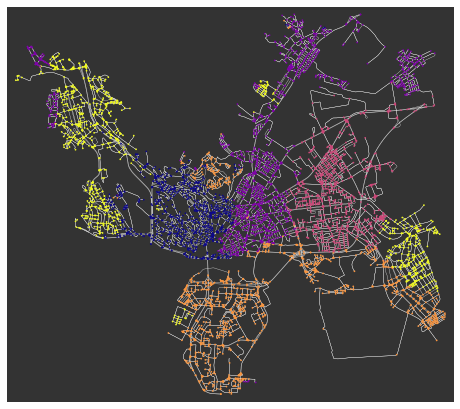

In [ ]:
# Visualize graph representation
clusters = {int(node): k_means.labels_[i] for i, node in enumerate(node_ids)}
nx.set_node_attributes(G, clusters, "cluster")

nc = ox.plot.get_node_colors_by_attr(G, attr="cluster", cmap="plasma")

fig, ax = ox.plot_graph(
    G,
    bgcolor="#333333",
    node_color=nc,
    node_zorder=2,
    edge_linewidth=0.3,
    edge_color="w",
    node_size=3,
)


### Spectral clustering

In [ ]:
# Compute similarity 
weight_att = nx.get_edge_attributes(G_dir, weight_type)
weight_similarity = {k: 1/v for k, v in weight_att.items()}
nx.set_node_attributes(G, weight_similarity, "similarity")

In [ ]:
# Compute node embedding
dim_embedding = 5  # Defines, dimensionality of embedding (recommended same as  number of clusters)
node_embeddings = spectral_embedding(nx.adjacency_matrix(G_dir.to_undirected(), weight="similarity"), n_components=dim_embedding)

In [ ]:
# Find communities in euclidean space
n_clusters = 5  # Defines, number of communities
k_means = KMeans(n_clusters=n_clusters).fit(node_embeddings)
k_means.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
# Apply t-SNE transformation on node embeddings for visualization
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
# Visualize 2d representation of nodes with 
plt.figure(figsize=(10, 8))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], c=k_means.labels_, cmap="plasma")

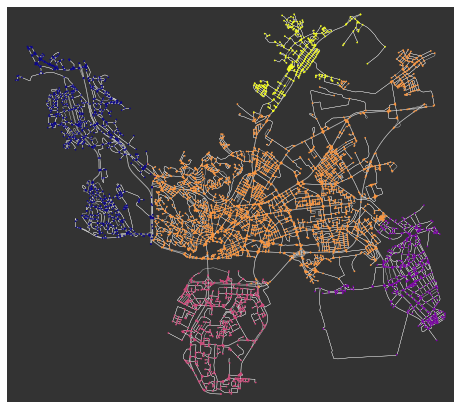

In [ ]:
# Visualize graph representation
clusters = {int(node): k_means.labels_[i] for i, node in enumerate(G.nodes)}
nx.set_node_attributes(G, clusters, "cluster")

nc = ox.plot.get_node_colors_by_attr(G, attr="cluster", cmap="plasma")

fig, ax = ox.plot_graph(
    G,
    bgcolor="#333333",
    node_color=nc,
    node_zorder=2,
    edge_linewidth=0.3,
    edge_color="w",
    node_size=3,
)


### Label propagation

In [ ]:
propagation_labels = label_propagation_communities(ox.get_digraph(G).to_undirected())
print(f"Number of clusters: {len(propagation_labels)}")

Number of clusters: 1601


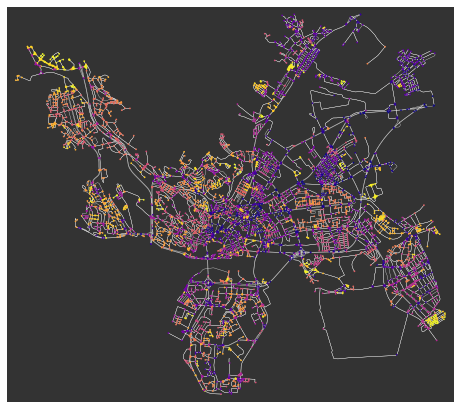

In [ ]:
# Visualize graph representation
clusters = {}
for i, cluster in enumerate(propagation_labels):
  for node in cluster:
    clusters[node] = i
nx.set_node_attributes(G, clusters, "cluster")

nc = ox.plot.get_node_colors_by_attr(G, attr="cluster", cmap="plasma")

fig, ax = ox.plot_graph(
    G,
    bgcolor="#333333",
    node_color=nc,
    node_zorder=2,
    edge_linewidth=0.3,
    edge_color="w",
    node_size=3,
)
